# Economics Ph.D. Job Placement Data 2024 Update
*Wuyang Ren*


## Coverage

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np

In [2]:
api_url = "https://support.econjobmarket.org/api/mapinator"
response = requests.get(api_url)

pl_data = response.json()
pl_df = pd.DataFrame(pl_data)


In [3]:
api_url = "https://support.econjobmarket.org/api/academic_tiers"
response = requests.get(api_url)

idt_data = response.json()

In [4]:
idt_df = pd.DataFrame(idt_data)
idt_df["institution_id"] = pd.to_numeric(idt_df["institution_id"])

### Number of Applicants with Recorded Outcoems

In [5]:
pl_df['created_at'] = pd.to_datetime(pl_df['created_at'])
pl_df['startdate']= pd.to_datetime(pl_df['startdate'])
pl_df['year'] = pl_df['startdate'].dt.year

In [6]:
pl_df['from_institution_id'] = pd.to_numeric(pl_df['from_institution_id'])
pl_df_merged = pd.merge(
    pl_df,
    idt_df,
    left_on="from_institution_id",
    right_on="institution_id",
    how="left")
pl_df_merged.rename(columns={"type": "graduating_tier"}, inplace=True)

tier_1 = pl_df_merged[pl_df_merged['graduating_tier'] == 1]
tier_2 = pl_df_merged[pl_df_merged['graduating_tier'] == 2]

t1_number = len(tier_1['from_institution_id'].unique())
t2_number= len(tier_2['from_institution_id'].unique())

print(f'The number of tier 1 and 2 institutions is {t1_number} and {t2_number} respectively')

The number of tier 1 and 2 institutions is 20 and 58 respectively


#### Tier 1

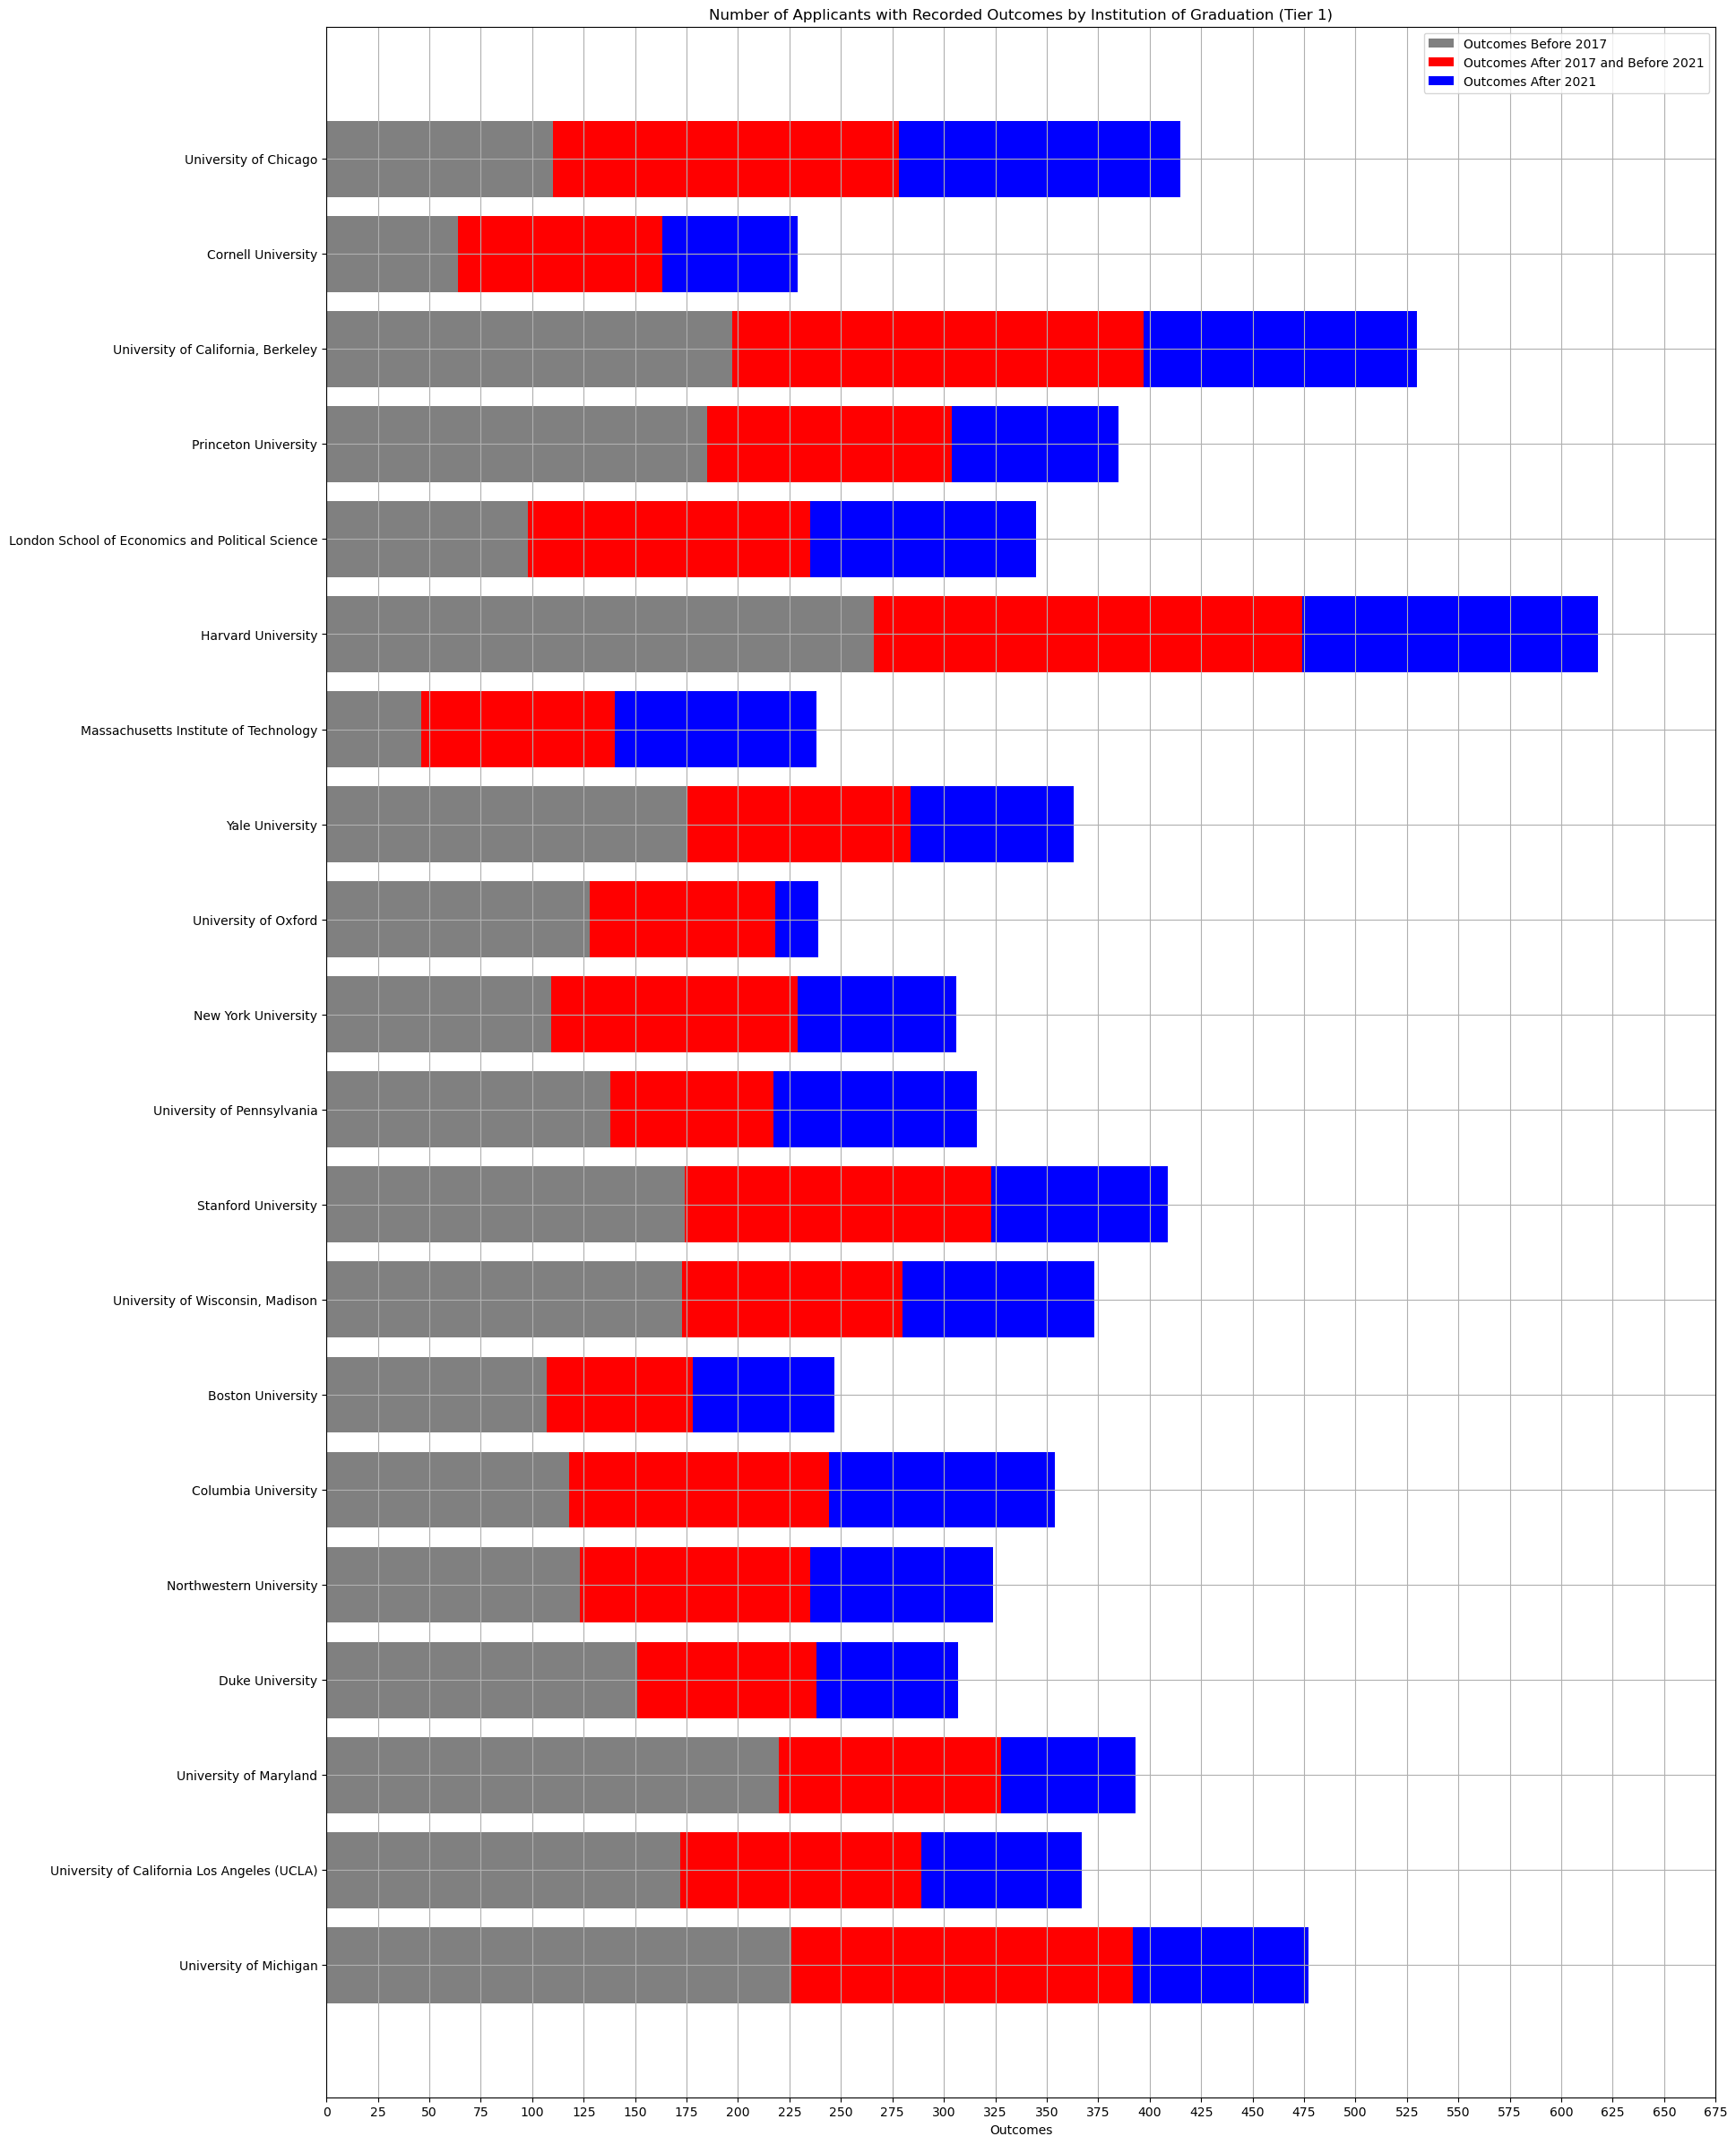

In [7]:
tier_1_initial = tier_1[tier_1['year'] <= 2016]
tier_1_before = tier_1[(tier_1['year'] > 2016) & (tier_1['year'] <= 2020)]
tier_1_after = tier_1[tier_1['year'] > 2020]

institutions = list(tier_1['from_institution_name'].unique())

initial_counts = [len(tier_1_initial[tier_1_initial['from_institution_name'] == i]['aid'].unique()) for i in institutions]
before_counts = [len(tier_1_before[tier_1_before['from_institution_name'] == i]['aid'].unique()) for i in institutions]
after_counts = [len(tier_1_after[tier_1_after['from_institution_name'] == i]['aid'].unique()) for i in institutions]
before_2020_counts = [i + j for i, j in zip(initial_counts, before_counts)]

fig, ax = plt.subplots(figsize=(20, 30))
bar1 = plt.barh(institutions, initial_counts, color='grey', label='Outcomes Before 2017')
bar2 = plt.barh(institutions, before_counts, left=initial_counts, color='red', label='Outcomes After 2017 and Before 2021')
bar3 = plt.barh(institutions, after_counts, left=before_2020_counts, color='blue', label='Outcomes After 2021')

ax.set_xlabel('Outcomes')
ax.set_title('Number of Applicants with Recorded Outcomes by Institution of Graduation (Tier 1)')
ax.legend()
ax.grid()
x_ticks = np.arange(0, 700, 25)
ax.set_xticks(x_ticks)

plt.show()

#### Tier 2

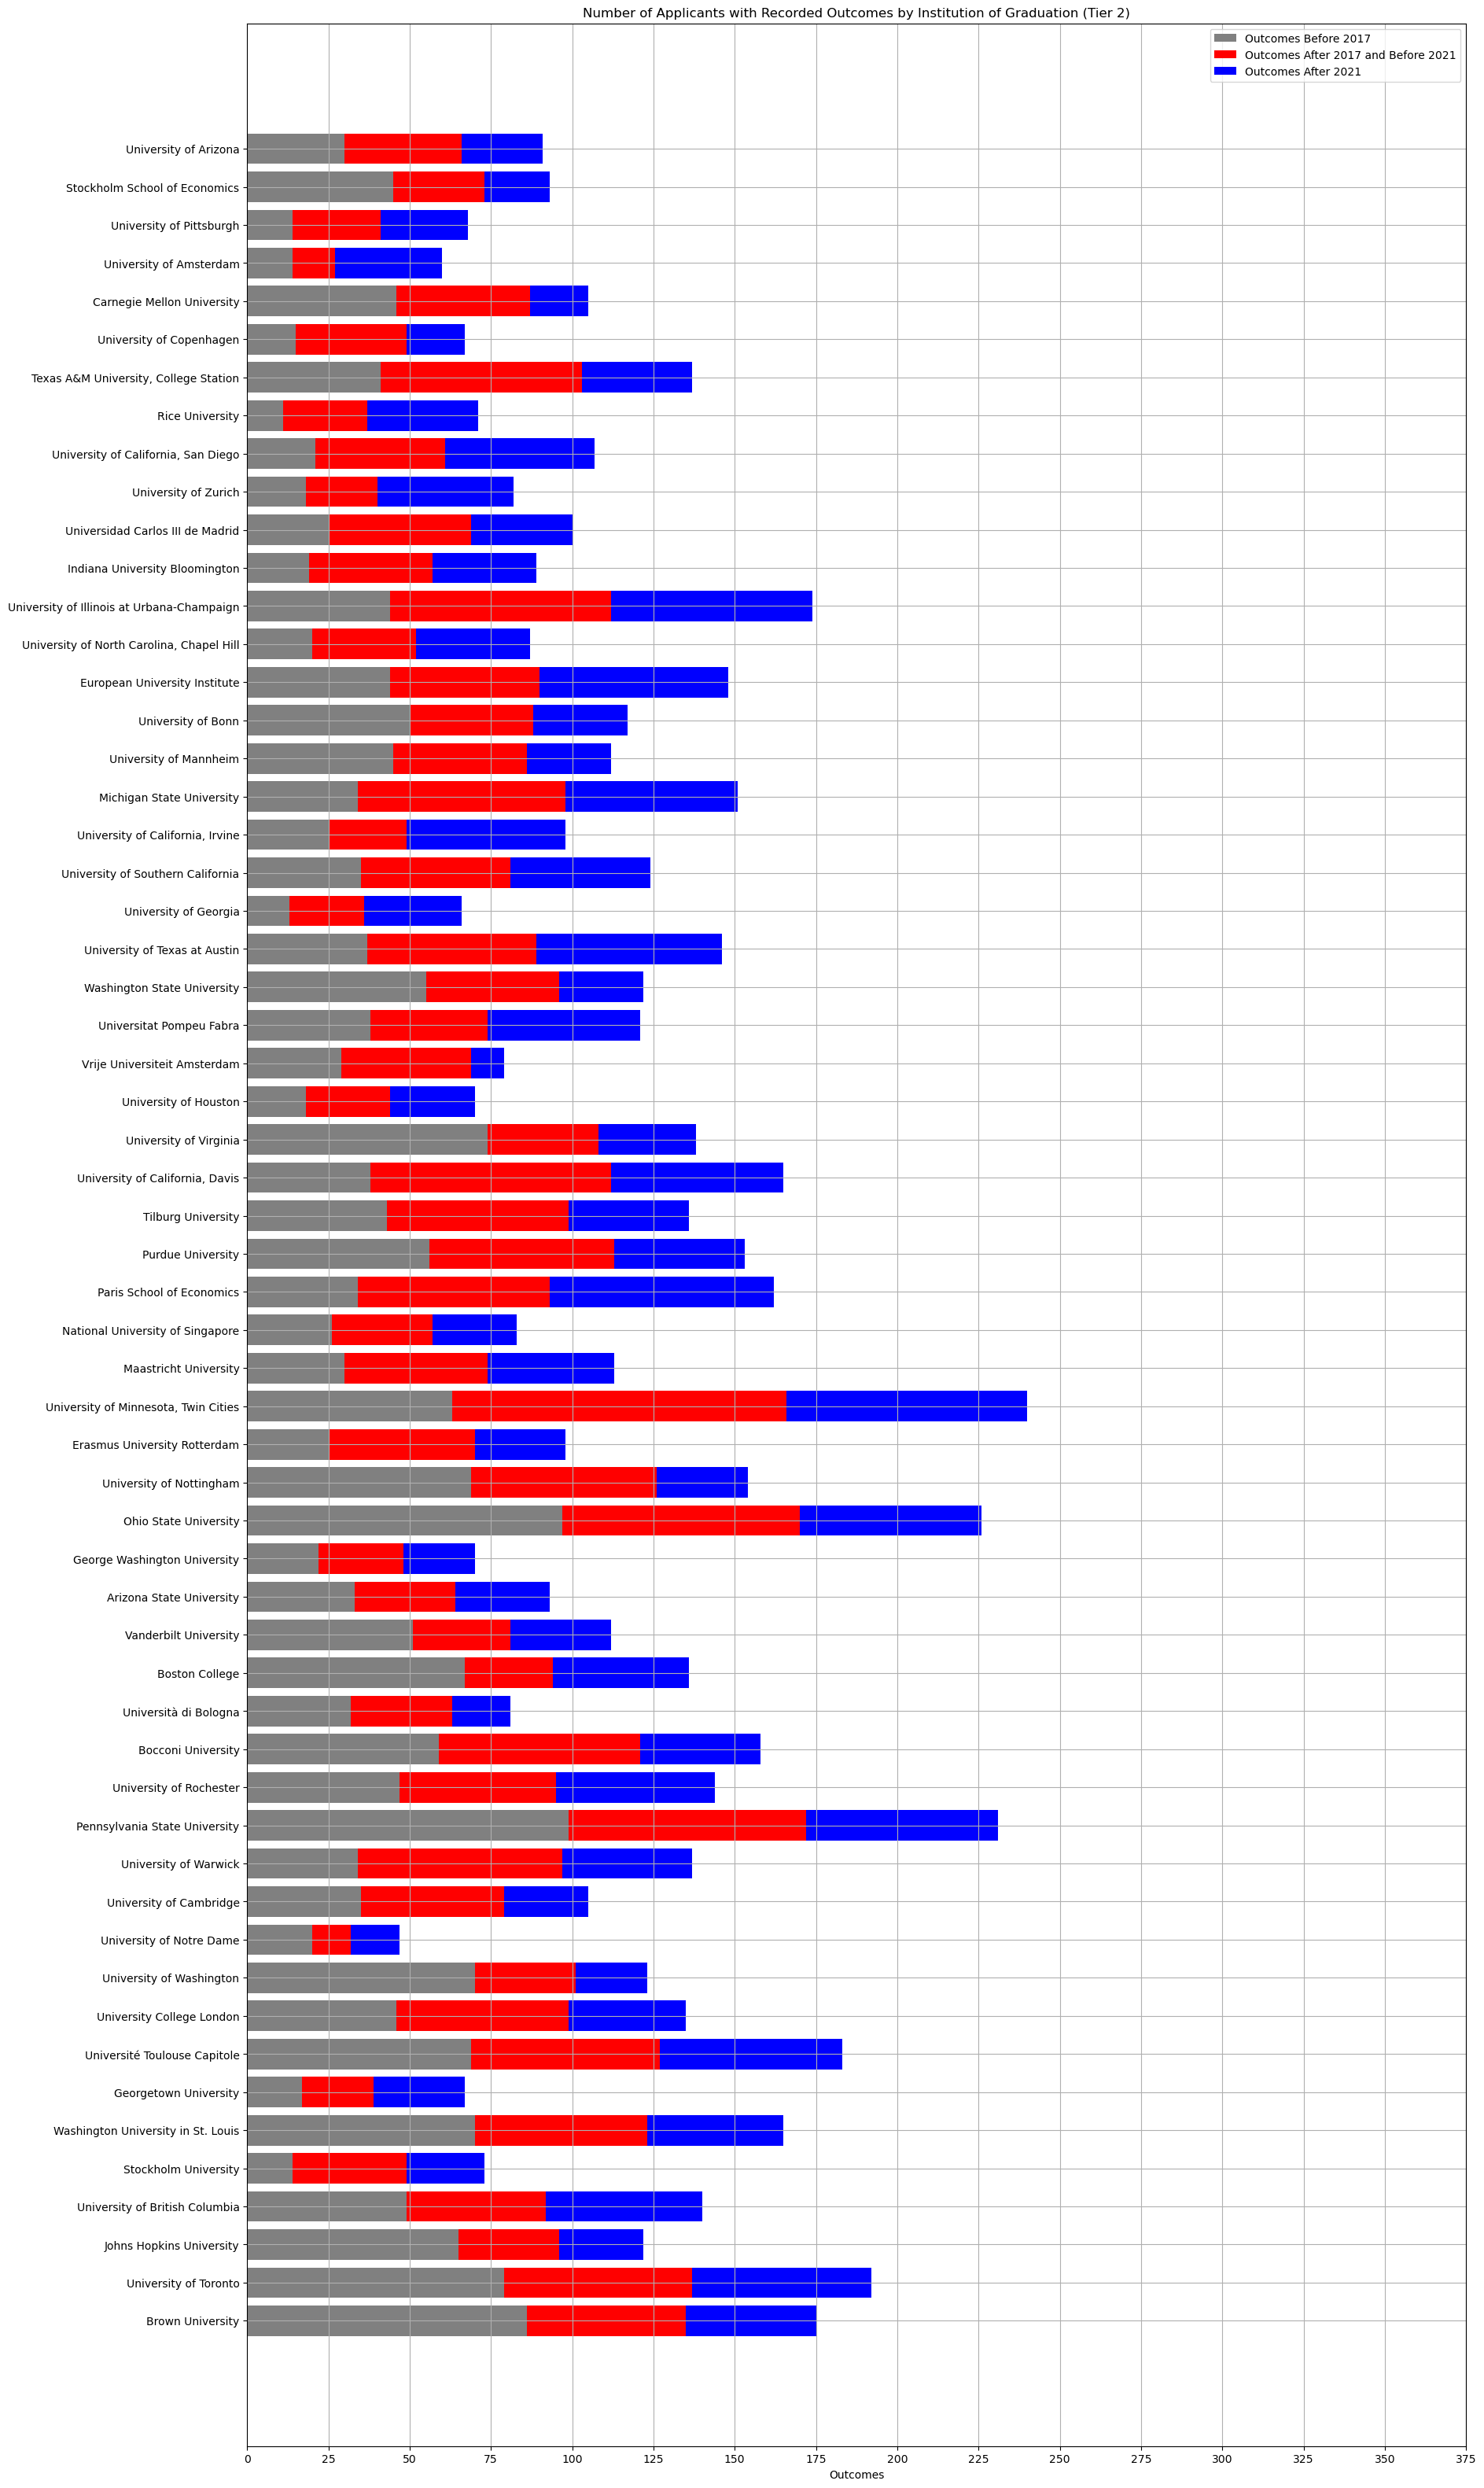

In [8]:
tier_2_initial = tier_2[tier_2['year'] <= 2016]
tier_2_before = tier_2[(tier_2['year'] > 2016) & (tier_2['year'] <= 2020)]
tier_2_after = tier_2[tier_2['year'] > 2020]

institutions = list(tier_2['from_institution_name'].unique())

initial_counts = [len(tier_2_initial[tier_2_initial['from_institution_name'] == i]['aid'].unique()) for i in institutions]
before_counts = [len(tier_2_before[tier_2_before['from_institution_name'] == i]['aid'].unique()) for i in institutions]
after_counts = [len(tier_2_after[tier_2_after['from_institution_name'] == i]['aid'].unique()) for i in institutions]
before_2020_counts = [i + j for i, j in zip(initial_counts, before_counts)]

fig, ax = plt.subplots(figsize=(20, 40))
bar1 = plt.barh(institutions, initial_counts, color='grey', label='Outcomes Before 2017')
bar2 = plt.barh(institutions, before_counts, left=initial_counts, color='red', label='Outcomes After 2017 and Before 2021')
bar3 = plt.barh(institutions, after_counts, left=before_2020_counts, color='blue', label='Outcomes After 2021')

ax.set_xlabel('Outcomes')
ax.set_title('Number of Applicants with Recorded Outcomes by Institution of Graduation (Tier 2)')
ax.legend()
ax.grid()
x_ticks = np.arange(0, 400, 25)
ax.set_xticks(x_ticks)

plt.show()

### Graduates by Year: First-Time Hires

#### Tier 1

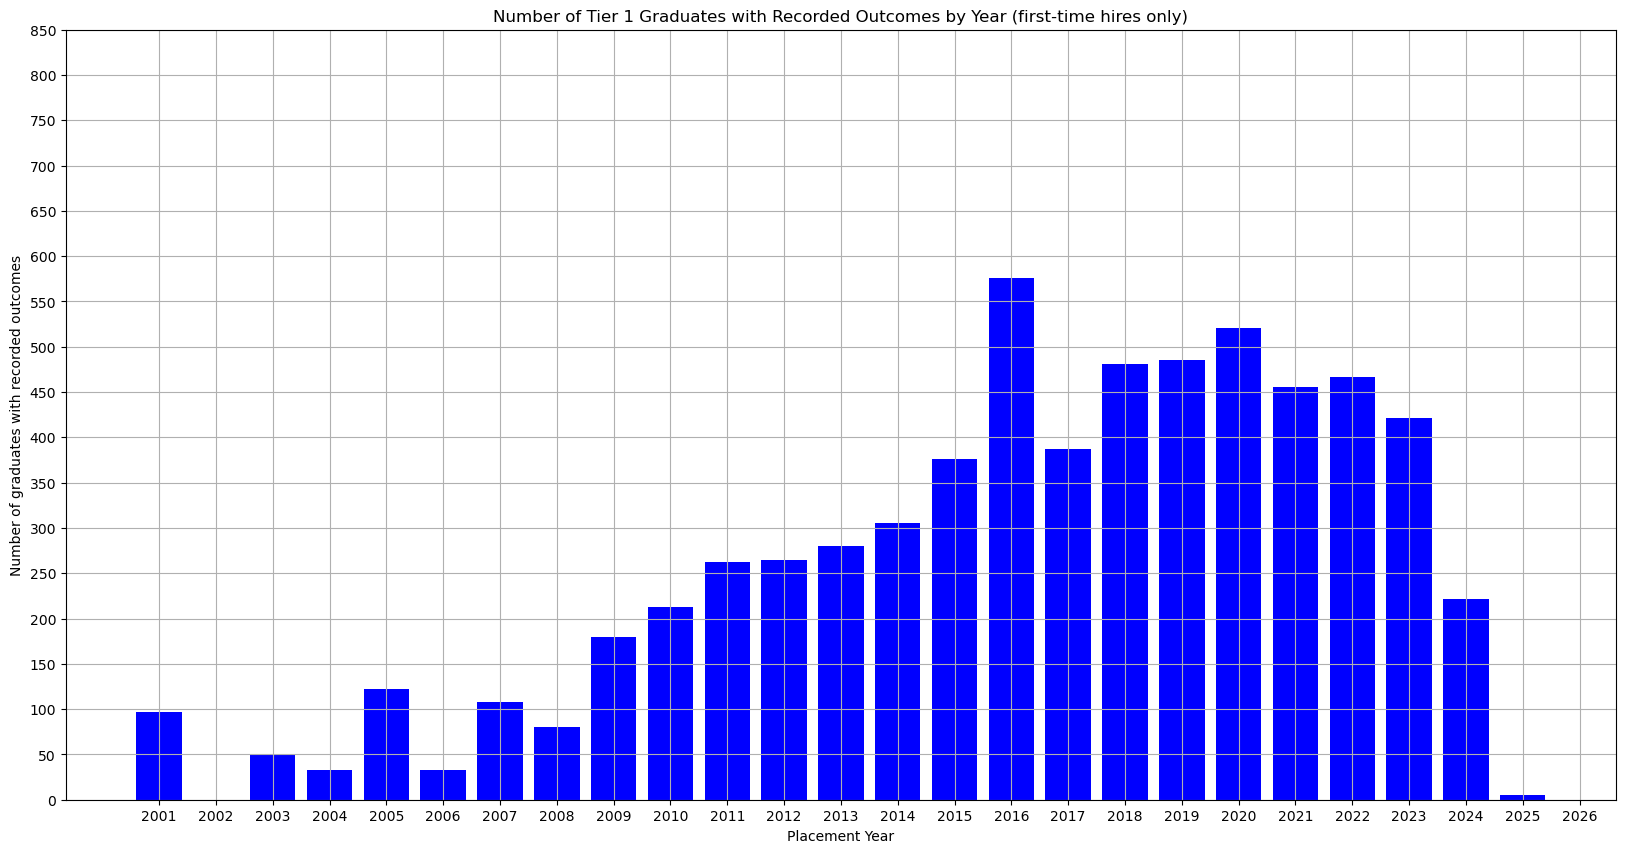

In [9]:
tier_1_unique = tier_1.sort_values('year').groupby('aid').first().reset_index()

first_time_counts = tier_1_unique.groupby('year').size()

years = first_time_counts.index



fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(years, first_time_counts , color='blue')


ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 900, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.grid()
ax.set_title("Number of Tier 1 Graduates with Recorded Outcomes by Year (first-time hires only)")
plt.show()

#### Tier 2

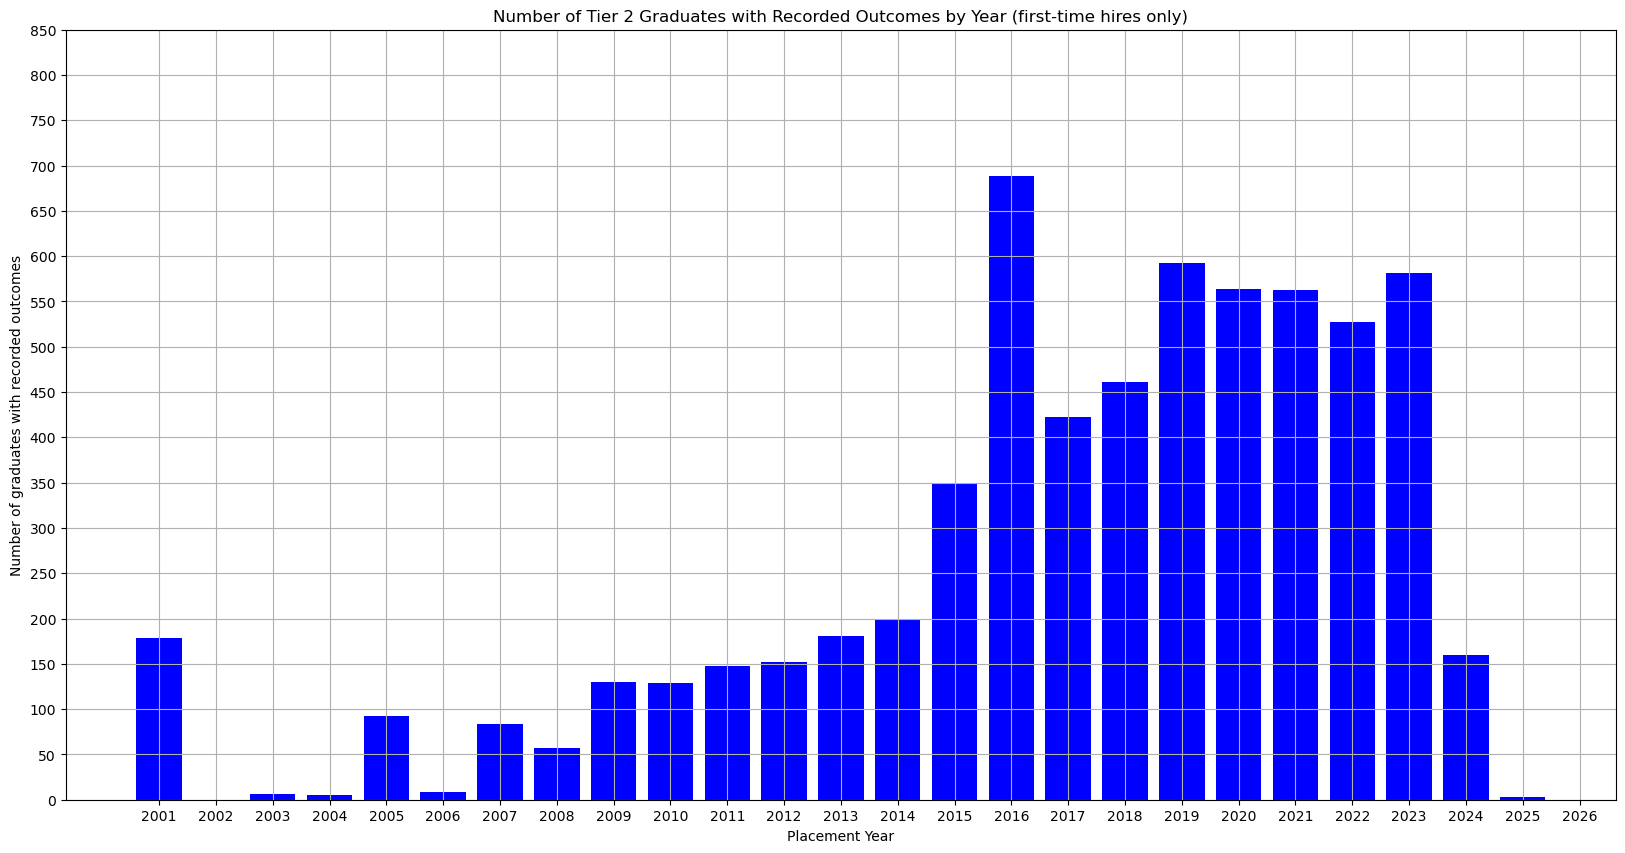

In [10]:
tier_2_unique = tier_2.sort_values('year').groupby('aid').first().reset_index()

first_time_counts = tier_2_unique.groupby('year').size()

years = first_time_counts.index

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(years, first_time_counts , color='blue')


ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 900, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.grid()
ax.set_title("Number of Tier 2 Graduates with Recorded Outcomes by Year (first-time hires only)")
plt.show()


### Graduates by Year: All Hires

#### Tier 1

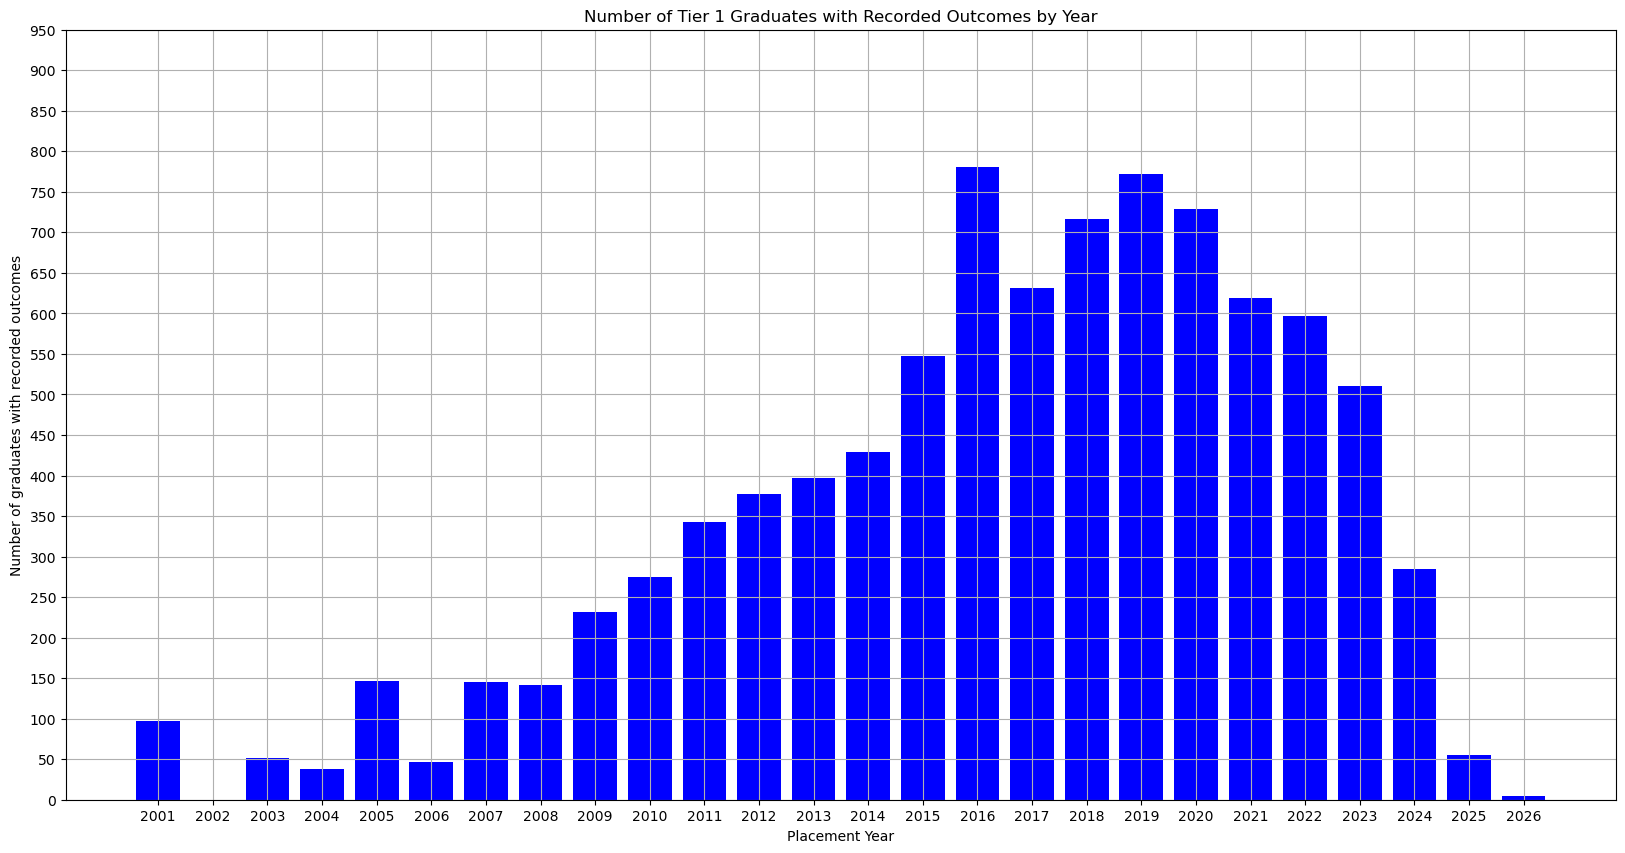

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

total_count = tier_1.groupby('year').size()

years = total_count.index

ax.bar(years, total_count, color='blue')


ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1000, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Tier 1 Graduates with Recorded Outcomes by Year")
ax.grid()
plt.show()


#### Tier 2

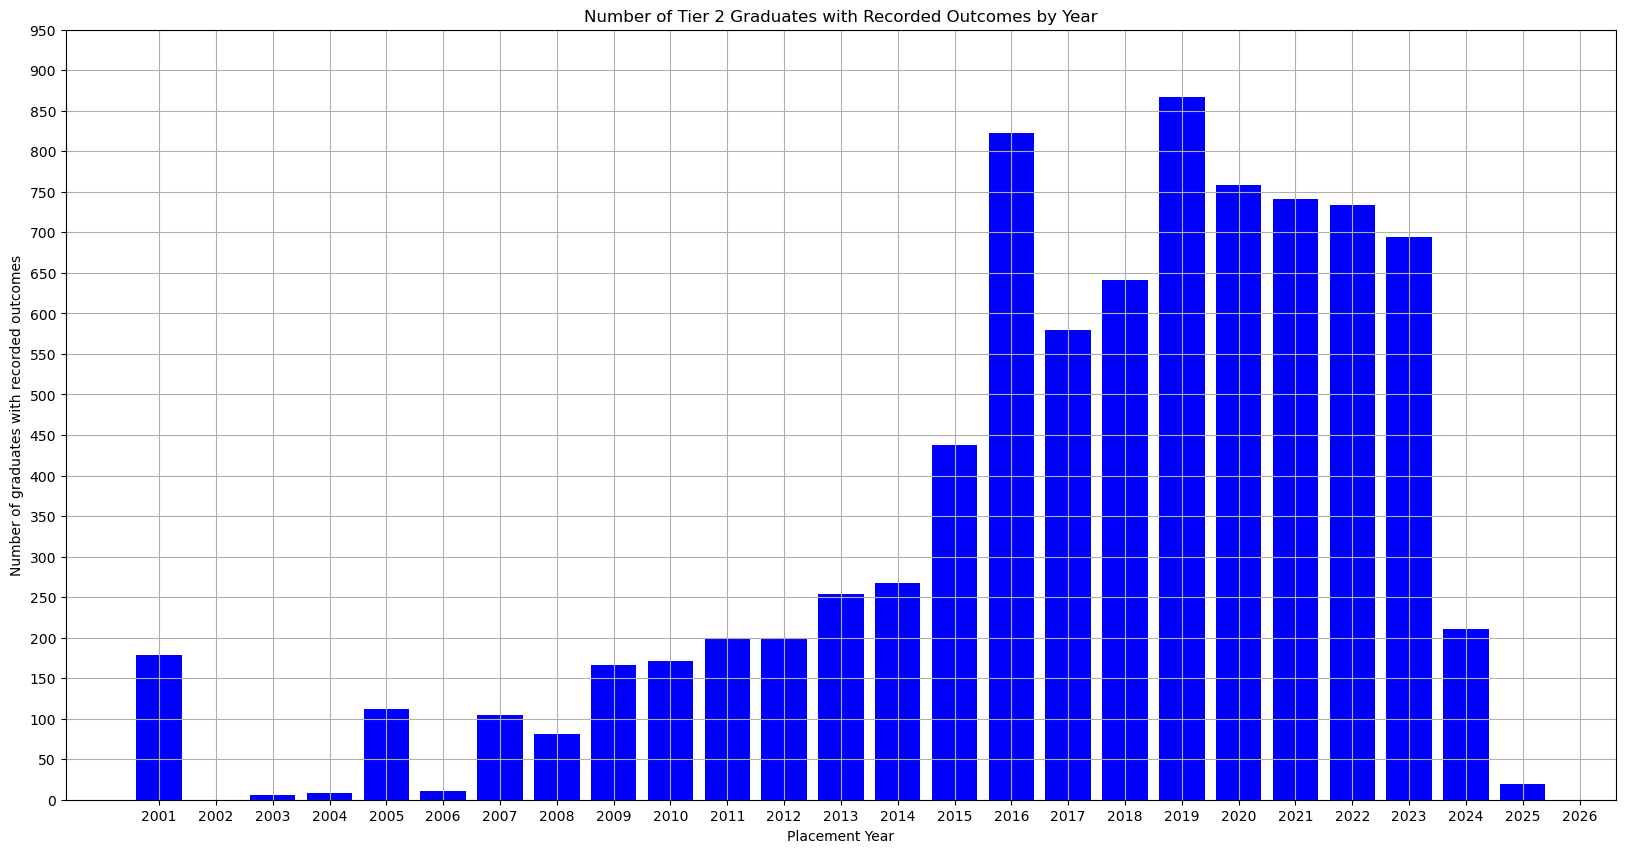

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

total_count = tier_2.groupby('year').size()

years = total_count.index

ax.bar(years, total_count, color='blue')


ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1000, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Tier 2 Graduates with Recorded Outcomes by Year")

ax.grid()
plt.show()
